In [4]:
import pandas as pd
df=pd.read_csv("haberman.csv")
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.status.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [6]:
df.shape

(306, 4)

- <u>Observation</u>: Dataset contains 306 rows and 4 columns

In [7]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

- <u>Objective</u>:Explore the given dataset using different graphs and find useful feature for the 
classification of data and give the result with suitable conclusion


In [9]:
df.status.value_counts()


1    225
2     81
Name: status, dtype: int64

- <u>observation</u>:data set looks like somewhat imbalance dataset

In [10]:
df.year.value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

In [11]:
import matplotlib.pyplot as plt

In [12]:
df.nodes.value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

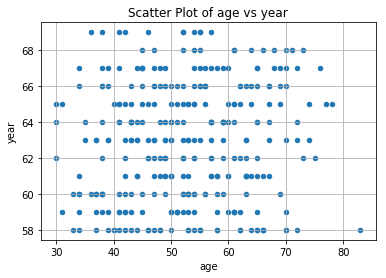

In [13]:
df.plot (kind="scatter" ,x="age",y="year")
plt.grid()
plt.title("Scatter Plot of age vs year")
plt.show()

- <u>observation</u>:due to same coloring of all data it is difficut to differentiate them .so lets make them colored.

In [15]:
import seaborn as sns

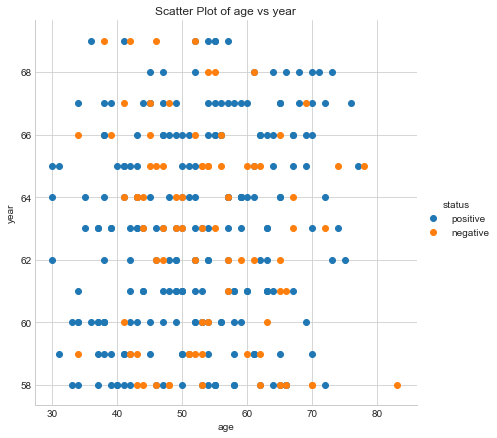

In [91]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=6) \
   .map(plt.scatter, "age", "year") \
   .add_legend()
plt.title("Scatter Plot of age vs year")
plt.show()


- <u>observation</u>: All the data is mixed,difficult to make any final conclusion.

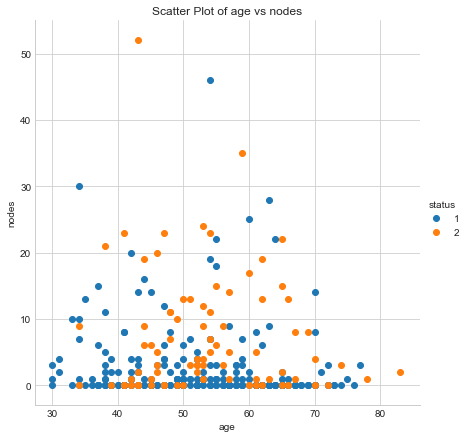

In [18]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=6) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend()
plt.title("Scatter Plot of age vs nodes")
plt.show()

- <u>observation</u>:Some point can be differentiate but still difficult to understand but better than earlier ghraph

In [20]:
df["status"] = df["status"].apply(lambda x: "positive" if x == 1 else "negative")
df.head(10)

,age,year,nodes,status
0,30,64,1,positive
1,30,62,3,positive
2,30,65,0,positive
3,31,59,2,positive
4,31,65,4,positive
5,33,58,10,positive
6,33,60,0,positive
7,34,59,0,negative
8,34,66,9,negative
9,34,58,30,positive


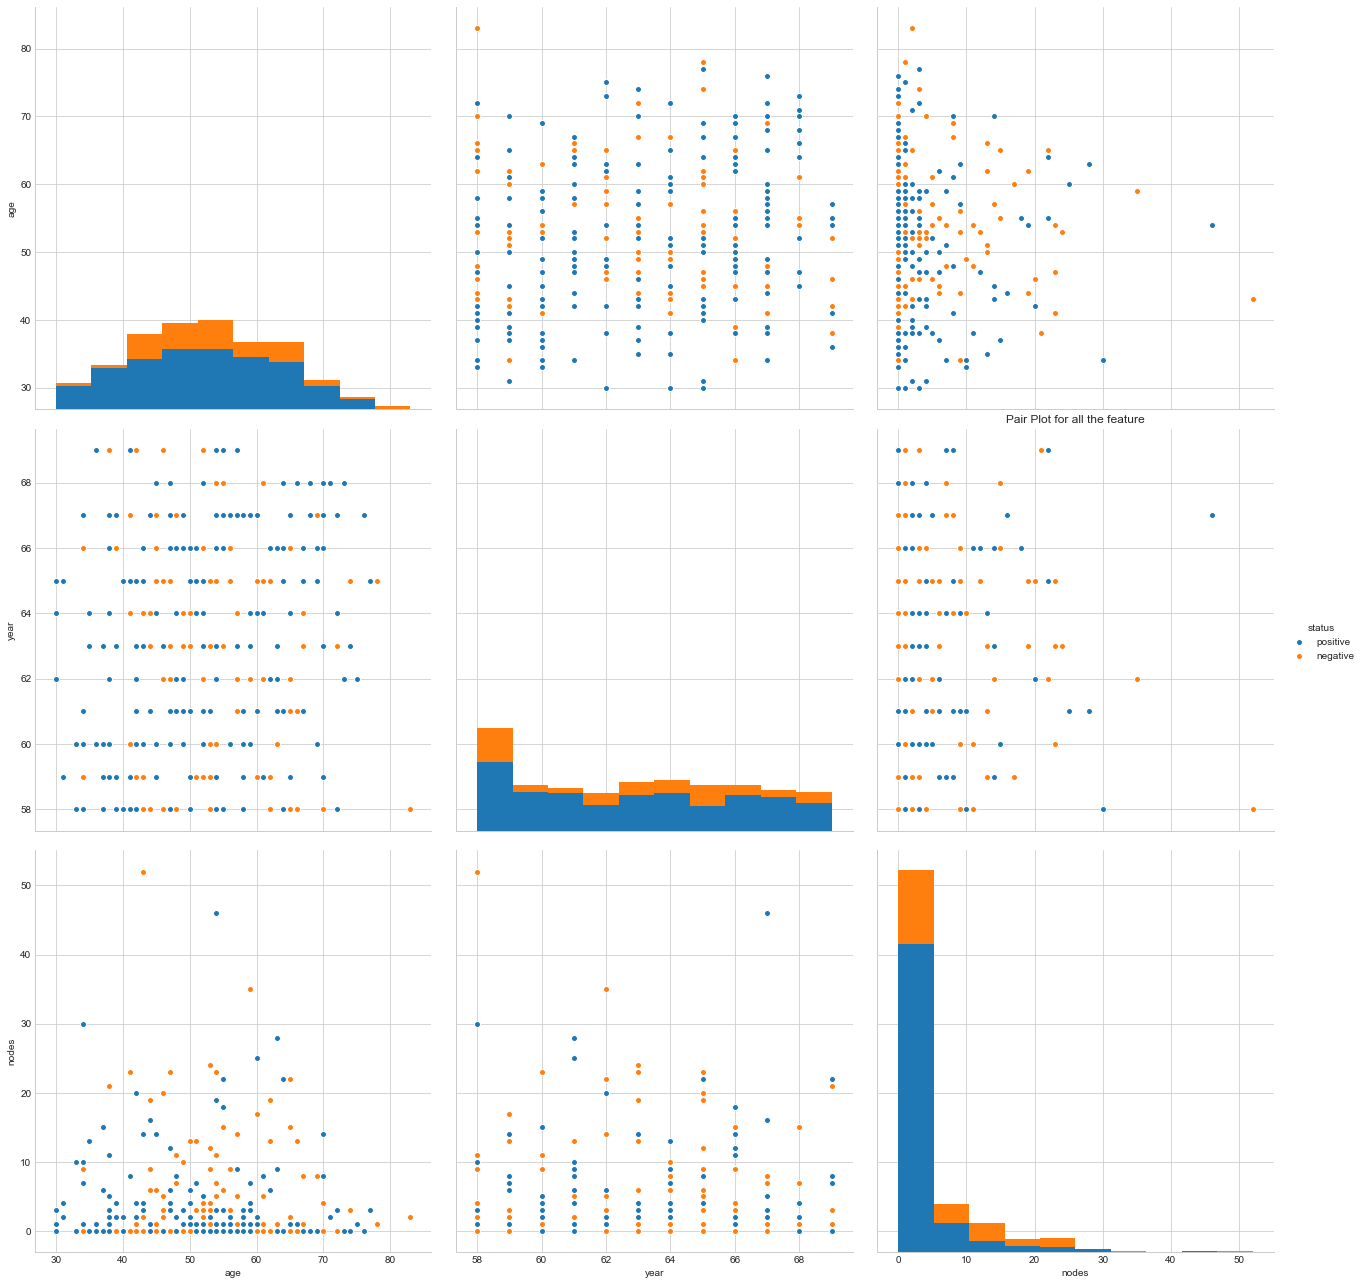

In [21]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", size=6);
plt.title("Pair Plot for all the feature")
plt.show()
 

- <u>observation</u>:there is somewhat difficult to differentiate b/w positive status and negative status due to 
overlap but there are some points which can be differentiate from graph of age vs nodes
so we can use this graph for further analysis

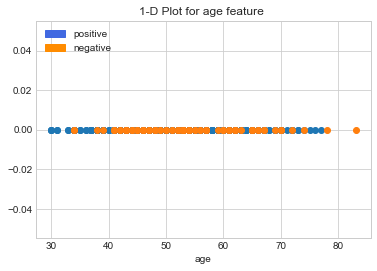

In [92]:
#1-D plot
import numpy as np
df_positive = df.loc[df["status"] == "positive"];
df_negative = df.loc[df["status"] == "negative"];
plt.plot(df_positive["age"], np.zeros_like(df_positive ['age']), 'o')
plt.plot(df_negative["age"], np.zeros_like(df_negative['age']), 'o')
blue_patch = mpatches.Patch(color='royalblue', label='positive')
brown_patch = mpatches.Patch(color='darkorange', label='negative')
plt.legend(handles=[blue_patch,brown_patch],loc="upper left")
plt.xlabel("age")
plt.title("1-D Plot for age feature ")
plt.show()

- <u>observation</u>: It has been observerd that due to overlapping of points we cant conclude any final result in one dimension.

In [32]:
import warnings
warnings.filterwarnings("ignore")

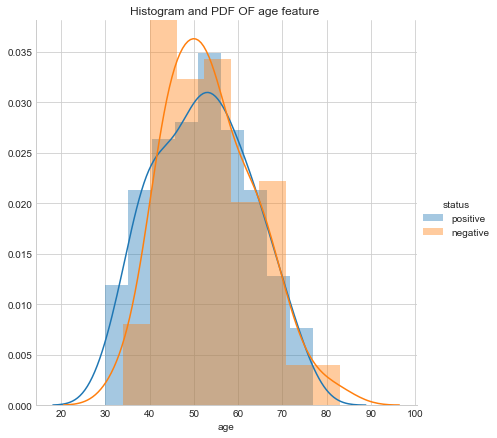

In [33]:
sns.FacetGrid(df, hue="status", size=6) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.title("Histogram and PDF OF age feature ")
plt.show()

import warnings
warnings.filterwarnings("ignore")

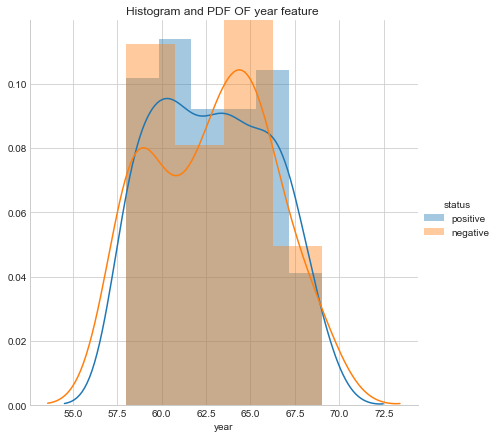

In [34]:
sns.FacetGrid(df, hue="status", size=6) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.title("Histogram and PDF OF year feature ")
plt.show()


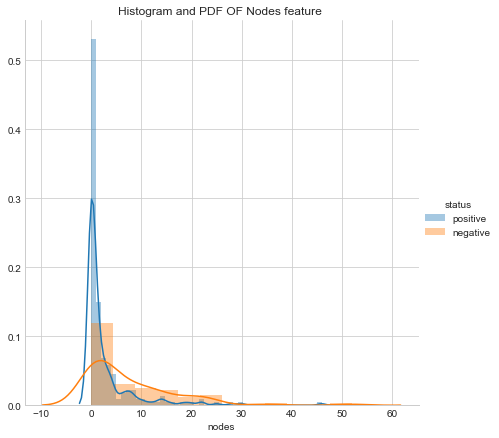

In [35]:
sns.FacetGrid(df, hue="status", size=6) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.title("Histogram and PDF OF Nodes feature ")
plt.show()


- <u>observations</u>:From above nodes histogram we can conclude following results
    * nodes<=0 == will survive
    * nodes>0 and <4(apporx.)==can have chance to survive long
    * nodes>4== they will short survive

now we can plot cdf for nodes as follows

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


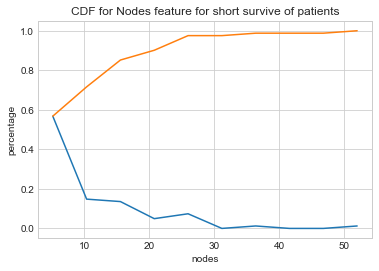

In [87]:
counts, bin_edges = np.histogram(df_negative['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.title("CDF for Nodes feature for short survive of patients")
plt.ylabel("percentage")
plt.xlabel("nodes")
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


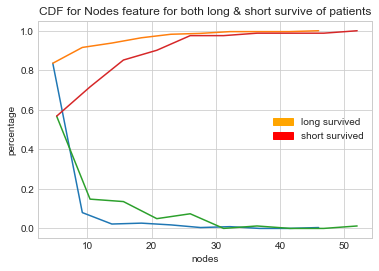

In [93]:
counts, bin_edges = np.histogram(df_positive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_negative['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.title("CDF for Nodes feature for both long & short survive of patients")
blue_patch = mpatches.Patch(color='orange', label='long survived')
brown_patch = mpatches.Patch(color='red', label='short survived')
plt.legend(handles=[blue_patch,brown_patch],loc="middle right")
plt.ylabel("percentage")
plt.xlabel("nodes")
plt.show();

- <u>observations</u>:
* RED line for short duration of survival of patients
* YELLOW line for long duration of survival of patients
* can conlude 55-57% of people are less than 5 nodes and alomst 100% of people when nodes are >40 in case of short term survival of patients
* Also we can say there are 85% of chances if nodes are less than 5 % in case of long survival of patients

- Mean, Variance, Std-deviation, 

In [150]:
 
print("Means:")
print(np.mean(df_positive["nodes"]))
print(np.mean(df_negative["nodes"]))

print("\nStd-dev:");
print(np.std(df_positive["nodes"]))
print(np.std(df_negative["nodes"]))


Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


- <u>observation</u>:Spread of the data in case of short survival of patients is more than the long survival of patients

- Median, Quantiles, Percentiles, IQR.

In [151]:

print("\nMedians:")
print(np.median(df_positive["nodes"]))
print(np.median(df_negative["nodes"]))



print("\nQuantiles:")
print(np.percentile(df_positive["nodes"],np.arange(0, 100, 25)))
print(np.percentile(df_negative["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(df_positive["nodes"],90))
print(np.percentile(df_negative["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df_positive["nodes"]))
print(robust.mad(df_negative["nodes"]))



Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


- <u>observations</u>:
* in Quantiles calculations nearly 50th% of axillary nodes are 0 in long survival of patients 
* and 75th% of patients have nodes<3
* In short survival of patients 75th% of patients have minimum 11 nodes detected.
* At 90th%  if nodes>8 then it is long survival patients and 
* if nodes >20 then patients is the case of short survive


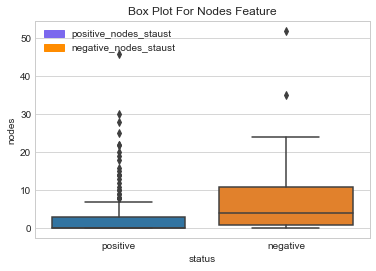

In [80]:
sns.boxplot(x='status',y='nodes', data=df)
plt.title("Box Plot For Nodes Feature")
blue_patch = mpatches.Patch(color='mediumslateblue', label='positive_nodes_staust')
brown_patch = mpatches.Patch(color='darkorange', label='negative_nodes_staust')
plt.legend(handles=[blue_patch,brown_patch],loc="upper left")
plt.show()

- <u>observations</u>:in box plot we observed the following:
* In case of long survival of patients 25 percentile and 50 percentile are on same line 
* and range of nodes is 0 to 8 (apporx)
* In case of short survival of patients 50 percentile of this is in the same line of  75 percentile of
* long survival data  
* and range of nodes is 0 to 25(apporx) 

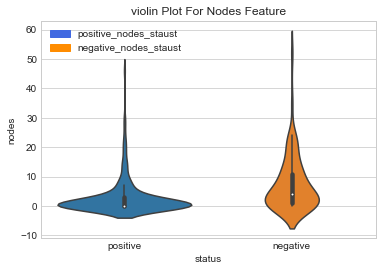

In [76]:
import matplotlib.patches as mpatches
sns.violinplot(x='status',y='nodes', data=df ,size=6)
plt.title("violin Plot For Nodes Feature")
plt.xlabel("status")
plt.ylabel("nodes")
blue_patch = mpatches.Patch(color='royalblue', label='positive_nodes_staust')
brown_patch = mpatches.Patch(color='darkorange', label='negative_nodes_staust')
plt.legend(handles=[blue_patch,brown_patch],loc="upper left")

plt.show()

<u>Observations</u>: in violin plot we observed following,
* For long survive patinets the density is more near the  nodes==0 and whiskers in range o-7 
* For short survive patients  density more from 0–18(apporx) ans whiskers in range 0–11

<u>overall_Observation</u>:By Exploring Habersman Dataset we will find that out of 3-features i.e.age,year,
nodes, Auxillary Nodes are one of the best feature for any conclusion and summerize results. 
we find that using differnt graphs and mathematical functions patients have less number of auxillary 
nodes have higher chance to long survive in life and patients have higher number of auxillary nodes
will be short survived in life

<u>conclusion</u>:
1. Overall  Dataset contains 306 rows and 4 columns with 3 features namely age,year and node
2. Type of data set is imbalance data type
3. By plotting all pairplots we find age vs nodes graph usefull for further analysis
4. Histogram,pdf and cdf of nodes gives important information on survival of patients
5. By finding mean and standard deviation of data we can say that Spread of the data in case of short survival of patients is more than the long survival of patients
6. Box-Plot and Violin plot gives us the information regarding percentile of data
7. Thus, we can finally conclude that patients have less number of auxillary nodes have higher chance to long survive in life and patients have higher number of auxillary nodes will be short survived in life